In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:

data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]
print ("Feature list:", feature_list)
print ("Label:", label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


# **Data Statistics**

Total entries: 1599 
There are total 12 columns: 11
features + 1 label
Label column: quality
Features: [fixed acidity, volitile
acidity, citric acid, residual sugar,
cholrides, free sulphur dioxide,
total sulphur dioxide, density, pH,
sulphates, alcohol]
All columns are numeric (float64) and the
label is an integer.


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data['quality'].value_counts(ascending=True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

Average quality wines are the highest in number while both low quality and high quality wines are rare

# **Plotting histogram to visualise the data**

Text(0, 0.5, 'Count')

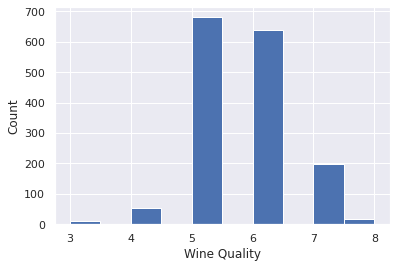

In [9]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')


sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

# **Dynamically add subplots **

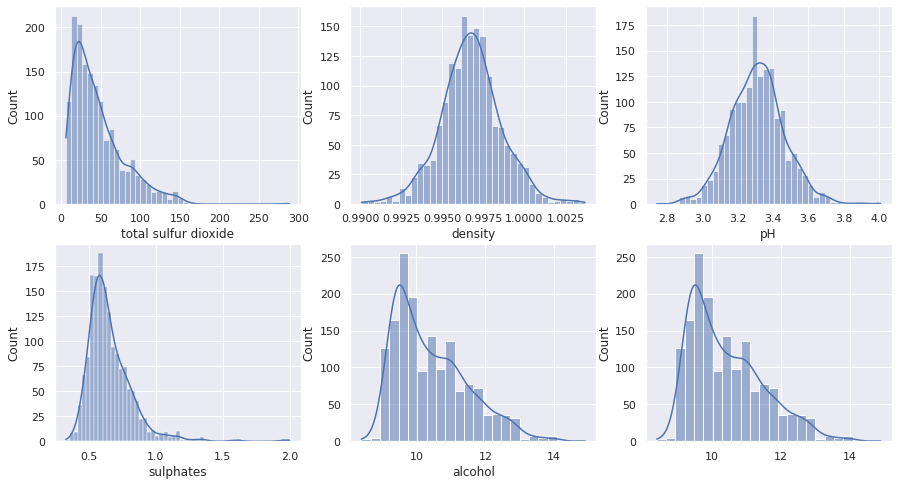

In [10]:

sns.set_theme()


fig, axs = plt.subplots(2, 3, figsize=(15, 8))
sns.histplot(data=data, x="total sulfur dioxide", kde=True, ax=axs[0, 0])
sns.histplot(data=data, x="density", kde=True,ax=axs[0, 1])
sns.histplot(data=data, x="pH", kde=True,  ax=axs[0, 2])
sns.histplot(data=data, x="sulphates", kde=True,  ax=axs[1, 0])
sns.histplot(data=data, x="alcohol", kde=True, ax=axs[1, 1])
sns.histplot(data=data, x="alcohol", kde=True, ax=axs[1, 2])
plt.xlabel('')


plt.show()

A few observations based on these plots:
1. Features are at different scales.
2. Features have different distributions

>  # **Splitting the data into training and test set**

# * *Splitting the dataset using a function* *

In [11]:
def split_train_test(data, test_ratio):
    # set the random seed.
    np.random.seed(42)
    # shuffle the dataset
    shuffled_indices = np.random.permutation(len(data))
    # calculate the size of the test set
    test_set_size = int(len(data) * test_ratio)
    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(data, 0.2)

# * *Splitting the data using scikit learn functions* *

# **Data cleaning and Preparation**

In [13]:
#Random sampling

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [14]:
#Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

# * *Comaparing stratified vs random sampling with overall distribution* *

In [15]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

In [16]:
overall_dist = data["quality"].value_counts() / len(data)

In [17]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['random_dist'] = test_set["quality"].value_counts() / len(test_set)
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(r-o)'] = dist_comparison['random_dist'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])
dist_comparison['diff(r-o)_pct'] = 100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])


In [18]:
dist_comparison

,overall,stratified,random_dist,diff(s-o),diff(r-o),diff(s-o)_pct,diff(r-o)_pct
5,0.425891,0.425000,0.406250,-0.000891,-0.019641,-0.209251,-4.611784
6,0.398999,0.400000,0.412500,0.001001,0.013501,0.250784,3.383621
7,0.124453,0.125000,0.131250,0.000547,0.006797,0.439698,5.461683
4,0.033146,0.034375,0.031250,0.001229,-0.001896,3.708726,-5.719340
8,0.011257,0.009375,0.015625,-0.001882,0.004368,-16.718750,38.802083
3,0.006254,0.006250,0.003125,-0.000004,-0.003129,-0.062500,-50.031250


> *Thus we can see that stratified sampling gives us test distribution closer to the overall distribution than the random sampling.*